In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lab3_6.csv', sep=";", encoding='windows-1251', skipinitialspace=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [19]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [20]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('quality', axis=1))
scaled_features = scaler.transform(df.drop('quality', axis=1))
scaled_df = pd.DataFrame(scaled_features, columns = df.drop('quality', axis=1).columns)

In [22]:
from sklearn.model_selection import train_test_split
x = scaled_df
y = df['quality']
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors_k = 18
model = KNeighborsClassifier(n_neighbors = n_neighbors_k)
model.fit(x_training_data, y_training_data)

KNeighborsClassifier(n_neighbors=18)

In [24]:
predictions = model.predict(x_test_data)

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        15
           5       0.64      0.72      0.68       196
           6       0.53      0.60      0.56       191
           7       0.50      0.33      0.40        64
           8       0.00      0.00      0.00        12

    accuracy                           0.58       480
   macro avg       0.28      0.27      0.27       480
weighted avg       0.54      0.58      0.55       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
print(confusion_matrix(y_test_data, predictions))

[[  0   0   2   0   0   0]
 [  0   0  11   4   0   0]
 [  0   1 142  51   2   0]
 [  0   0  61 114  16   0]
 [  0   0   5  38  21   0]
 [  0   0   1   8   3   0]]


In [29]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(y_test_data, predictions)

array([[  0,   2,   0,   0],
       [  0,  11,   4,   0],
       [  1, 142,  51,   2],
       [  0,  61, 114,  16],
       [  0,   5,  38,  21],
       [  0,   1,   8,   3]])

K =  22
Error =  0.39375


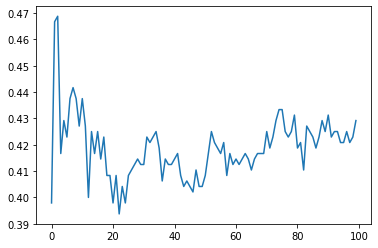

In [30]:
from sklearn.neighbors import KNeighborsClassifier
error_rates = []
for i in np.arange(1, 101):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(x_training_data, y_training_data)
    new_predictions = new_model.predict(x_test_data)
    error_rates.append(np.mean(new_predictions != y_test_data))
val, idx = min((val, idx) for (idx, val) in enumerate(error_rates))
plt.plot(error_rates)
print("K = ",idx)
print("Error = ",error_rates[idx])